In [1]:
# code to anonymize my data by removing each email and name and 
# replacing it with a unique identifier

import pandas as pd
# df_fall = pd.read_csv('fall15datawithdashboard.csv',low_memory=False)

# names = list(df_fall.name.unique())

# count = 0
# for name in names:
#     df_fall.loc[df_fall.name == name,'email'] = count
#     df_fall.loc[df_fall.name == name,'name'] = count
#     count += 1

# df_fall.to_csv('AdvancedPandasTutorial.csv',index=False)

In [2]:
#because data have mixed types, we have to use low_memory=False to avoid getting a DtypeWarning
df_fall = pd.read_csv('AdvancedPandasTutorial.csv',low_memory=False)

In [3]:
#BOOLEAN INDEXING
#keep only records with a "verb" of "clicked"
fall15dashboard = df_fall[df_fall.verb == 'clicked'].copy()

#READ CSV
namesdf = pd.read_csv('testcsv.csv')

#BOOLEAN INDEXING--ONLY KEEP CONSENTING STUDENTS (in a list)
#df[df.column == something][desired_column_afterwards]
emails = list(namesdf[namesdf['Consent Name'] == namesdf['Consent Name']]['LTI Email'])

#.isin operator allows you to see if a column is in a list
#fall15dashboard = fall15dashboard[fall15dashboard.email.isin(emails)].copy()

#pd.to_datetime creates a datetime date
fall_ex2_start = pd.to_datetime('10/22/2015')

#changes the timestamp column to a datetime format
fall15dashboard.timestamp = pd.to_datetime(fall15dashboard.timestamp)

#now that fall_ex2_start and timestamp are both datetimes, we can use them in boolean indexing
fall15dashboard = fall15dashboard[fall15dashboard.timestamp > fall_ex2_start].copy()

OSError: File b'testcsv.csv' does not exist

In [4]:
#A pandas series .value_counts() will give you the number of times each number appears
fall15dashboard.name.value_counts()

3      354
2      225
0      218
58     218
63     165
27     159
59     129
148     89
1       83
121     72
149     66
101     62
108     59
29      53
67      53
85      48
83      45
106     44
6       42
51      42
34      39
156     37
155     37
45      36
25      34
31      33
96      32
8       32
79      32
21      31
      ... 
90      10
139     10
135      9
77       9
23       9
57       9
49       8
41       8
20       8
124      7
154      7
60       6
89       5
143      4
32       4
7        4
84       3
24       3
107      3
55       3
18       2
16       2
14       2
144      2
128      2
80       2
133      2
33       1
95       1
127      1
Name: name, dtype: int64

In [5]:
#code to import visualization library
import matplotlib
%matplotlib inline

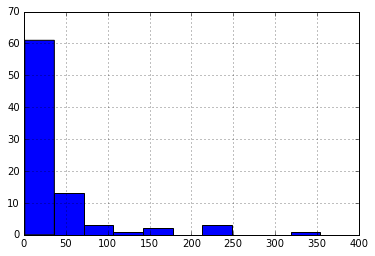

In [6]:
#using value_counts() and hist() in the same function
#this gives me a histogram for the # of click events at the student level
fall15dashboard.name.value_counts().hist()

In [8]:
#Number of students that accessed the dashboards (click events greater than 0)
print (fall15dashboard.name.value_counts().count())

84


In [9]:
#.count() gives me the total number of records or cases in a dataset
fall15dashboard.timestamp.count()

3184

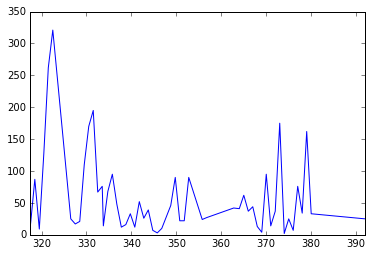

In [10]:
#sort values using the .sort_values(['desired_column']) command to sort dataframe
testfall = fall15dashboard.sort_values(['name','timestamp']).copy()
testfall.timestamp = pd.to_datetime(testfall.timestamp)

#use .apply or .map (lambda x: ) when you want to perform something to each value in a pandas column or series
#here I want to graph student activity in the dashboard over time (using timestamps)
testfall['month'] = testfall.timestamp.apply(lambda x: x.month * 30.25)
testfall['day'] = testfall.timestamp.apply(lambda x: x.day)
testfall['month_day'] = testfall.month + testfall.day
testfall.month_day.value_counts().sort_index().plot()

In [11]:
#percent of students with greater than 25 clicks
#more complicated Boolean indexing. What does this do if emails is the number of students?
print ("percent of students each semester with greater than 25 clicks")
print (fall15dashboard.name.value_counts()[fall15dashboard.name.value_counts().values > 25].count() / float(len(fall15dashboard.name.unique())))

percent of students each semester with greater than 25 clicks
0.404761904762


In [12]:
#percent of students with greater than 50 clicks
print ("percent of students each semester with greater than 50 clicks")
print (fall15dashboard.name.value_counts()[fall15dashboard.name.value_counts().values > 50].count() / float(len(fall15dashboard.name.unique())))

percent of students each semester with greater than 50 clicks
0.178571428571


In [13]:
#percent of students with greater than 100 clicks
print ("percent of students each semester with greater than 100 clicks")
print (fall15dashboard.name.value_counts()[fall15dashboard.name.value_counts().values > 100].count() / float(len(fall15dashboard.name.unique())))

percent of students each semester with greater than 100 clicks
0.0833333333333


In [14]:
#I'm trying to identify whether our changes made students use the dashboards more frequently
#Calculate student use for the first exam they had access to the dashboard
#Then calculate student use for the second exam they had access to the dashboard
fall15dashboard.timestamp = pd.to_datetime(fall15dashboard.timestamp)

#creating dates based on exam dates
fall_ex1_start = pd.to_datetime('08/31/2015')
fall_ex2_start = pd.to_datetime('10/22/2015')
fall_ex3_start = pd.to_datetime('11/14/2015')
fall_ex4_start = pd.to_datetime('12/05/2015')
fall_end = pd.to_datetime('12/18/2015')

In [15]:
#more complicated boolean indexing
#this will print the number of dashboard events during each time period
print (fall15dashboard[fall15dashboard.timestamp < fall_ex3_start].timestamp.count())
print (fall15dashboard[(fall15dashboard.timestamp < fall_ex4_start)&(fall15dashboard.timestamp > fall_ex3_start)].timestamp.count())
print (fall15dashboard[(fall15dashboard.timestamp < fall_end)&(fall15dashboard.timestamp > fall_ex4_start)].timestamp.count())

1925
557
677


In [16]:
number_of_questions_fall = len(df_fall[df_fall.verb == 'answered'].object.unique())

watched             2.524294
answered            0.963045
attempted           0.651676
played              0.515831
suspended           0.371796
paused              0.329924
jumped              0.265248
started             0.208042
ended               0.149551
launched            0.117907
completed           0.083659
showed_answer       0.081072
changed_playrate    0.062945
clicked             0.054550
showed_hint         0.042421
minimized           0.031576
changed_volume      0.008241
exited              0.006459
Name: verb, dtype: float64


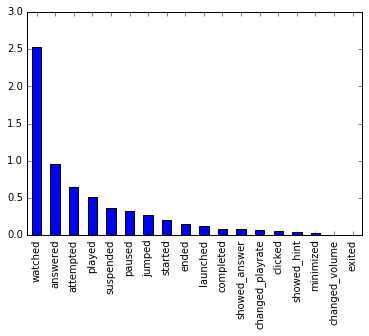

In [19]:
#quiz and video activity
#number of events per question per student
print ((df_fall.verb.value_counts() / float(number_of_questions_fall) / len(df_fall.name.unique())))
(df_fall.verb.value_counts() / float(number_of_questions_fall) / len(df_fall.name.unique())).plot(kind='bar')

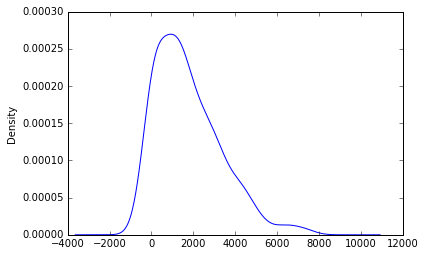

In [20]:
df_fall.name.value_counts().plot(kind='kde')

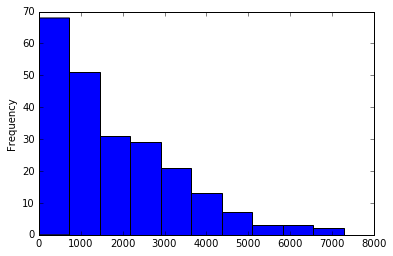

In [21]:
df_fall.name.value_counts().plot(kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x125798400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x128766a90>], dtype=object)

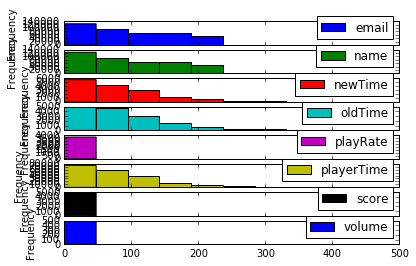

In [23]:
#subplots = True means it will create a separate plot for each column in the dataframe
df_fall.plot(kind='hist',subplots=True)

In [ ]:
#see more graphing documentation here:
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html